In [ ]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
##import numpy, scipy

#Specific modules and routines
from scipy.integrate import odeint
from IPython.core.display import HTML
from scipy.interpolate import interp1d
from scipy.integrate import quad
from astroquery.jplhorizons import Horizons

In [ ]:
from astropy import constants as c
M_sun = c.M_sun
M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

In [ ]:
from astropy.time import Time
epoch = Time("2023-01-01 00:00:00", format="iso").jd
jupiter = Horizons(id="599", location="@Sun").elements().to_pandas()

a_planet = jupiter.a[0]
P_planet = jupiter.P[0]

In [ ]:
io = Horizons(id="501", location="@5").elements().to_pandas()

In [ ]:
M_planet = M_sun*(io.a[0]/a_planet)**3*(P_planet/io.P[0])**2
M_planet

<Quantity 1.89643942e+27 kg>

In [ ]:
a_moons = []
P_moons = []
for imoon in range(1,15):
    moon = Horizons(id=str(500+imoon), location="@5", epochs=epoch).elements().to_pandas()
    a_moons += [moon.a]
    P_moons += [moon.P]
    
a_moons=np.array(a_moons)
P_moons=np.array(P_moons)

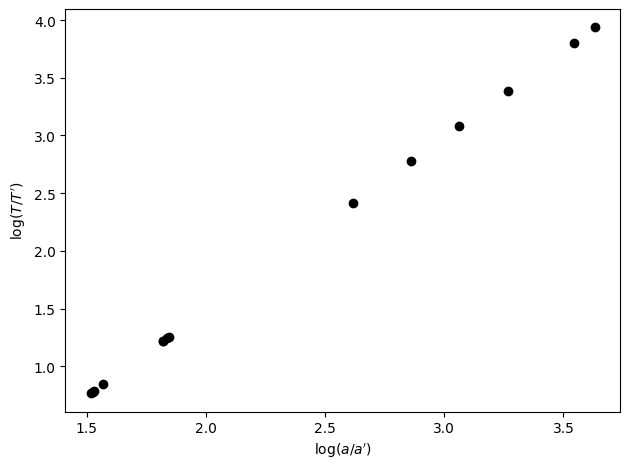

In [ ]:
fig,ax = plt.subplots()

ax.plot(np.log10(a_planet/a_moons), 
        np.log10(P_planet/P_moons), 'ko')

#Decoration
ax.set_xlabel(r"$\log(a/a')$")
ax.set_ylabel(r"$\log(T/T')$")

fig.tight_layout()

In [ ]:
x = [i[0] for i in np.log10(a_planet/a_moons)]
y = [i[0] for i in np.log10(P_planet/P_moons)]

df = pd.DataFrame(dict(
    x = x,
    y = y
))


In [ ]:
import plotly.express as px
fig = px.scatter(x=x, y=y)
fig.show()

In [19]:
import plotly.express as px
fig = px.scatter(x=x, y=y, trendline="ols")
fig.update_traces(marker=dict(size=14,
                              line=dict(width=2,
                              color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
   title="Example plotly plot",
   xaxis_title="Log(a/a')",
   yaxis_title="Log(T/T')",
   font=dict(
      family="Arial",
      size=20,
   )
)
fig.show()

<Axes: xlabel='x', ylabel='y'>

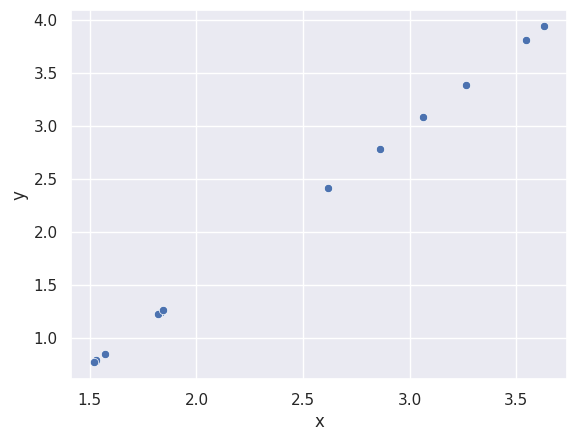

In [ ]:
import seaborn as sns 
sns.set_theme()

sns.scatterplot(data=df, x="x", y="y")


In [ ]:
from sklearn.linear_model import LinearRegression

xs = np.log10(a_planet/a_moons).reshape((-1,1))
ys = np.log10(P_planet/P_moons)

model = LinearRegression().fit(xs, ys)

#Coefficients
m = model.coef_[0]
b = model.intercept_

print(f"Slope: {m}")
print(f"Intercept: {b}")

Slope: [1.49999055]
Intercept: [-1.51024056]


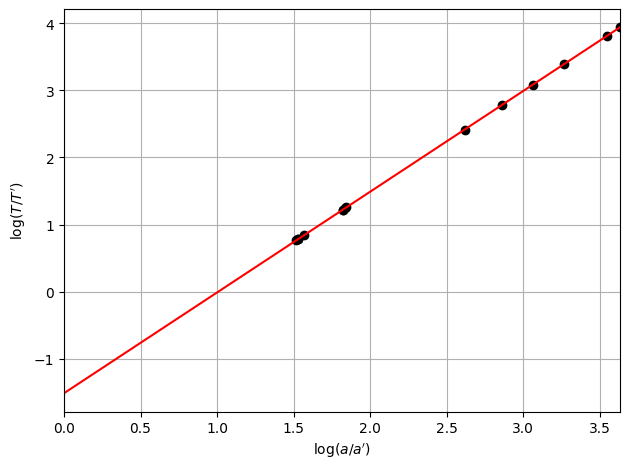

In [ ]:
fig,ax = plt.subplots()

#Expected
xes = np.linspace(0,xs.max()).reshape((-1,1))
yes = model.predict(xes)

#Observed
ax.plot(xs, ys, 'ko')
ax.plot(xes, yes, 'r-')

#Adjust
ax.set_xlim(0, xs.max())

#Decoration
ax.set_xlabel(r"$\log(a/a')$")
ax.set_ylabel(r"$\log(T/T')$")
ax.grid()

fig.tight_layout()

<style>
    p {
        text-align: justify; color:#f14848; 
    }


</style>    
<h1>L2 es la casa donde se ubica el telescopio James Webb</h1>

<p>When you ask an astronomer about the James Webb Space Telescope's orbit, they'll tell you something that sounds like it came from a science-fiction novel. The Webb won't be orbiting the Earth –instead we will send it almost a million miles out into space to a place called "L2." L2 is short-hand for the second Lagrange Point, a wonderful accident of gravity and orbital mechanics, and the perfect place to park the Webb telescope in space. There are five so-called "Lagrange Points" - areas where gravity from the sun and Earth balance the orbital motion of a satellite. Putting a spacecraft at any of these points allows it to stay in a fixed position relative to the Earth and sun with a minimal amount of energy needed for course correction.</p>

<img src="JW.jpg" alt="Aqui esta la foto del James Webb">